In [37]:
import numpy as np
import mtcnn
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw

In [5]:
# lets create a MTCNN class so we can detect faces
face_detector = mtcnn.MTCNN()

(1080, 1920, 3)


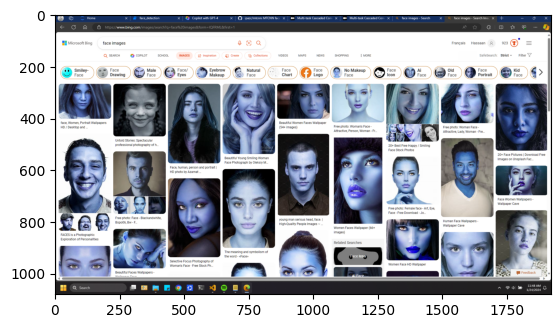

In [7]:
# loads the image with 3 channels as BGR drops the transparancy channel "a". This needs to be converted to RGB since the mtcnn model expects a RGB image
test_image_cv2 = cv2.imread('./face_detection_test.png')
plt.imshow(test_image_cv2)
print(test_image_cv2.shape)

In [20]:
faces = face_detector.detect_faces(test_image_cv2)

4/4 [==============================] - 0s 7ms/step


In [21]:
faces

[{'box': [939, 264, 107, 137],
  'confidence': 0.9999891519546509,
  'keypoints': {'left_eye': (969, 314),
   'right_eye': (1021, 314),
   'nose': (995, 346),
   'mouth_left': (975, 372),
   'mouth_right': (1017, 372)}},
 {'box': [1758, 566, 96, 122],
  'confidence': 0.9999831914901733,
  'keypoints': {'left_eye': (1781, 611),
   'right_eye': (1826, 612),
   'nose': (1802, 631),
   'mouth_left': (1786, 658),
   'mouth_right': (1815, 658)}},
 {'box': [1501, 817, 181, 224],
  'confidence': 0.9999616146087646,
  'keypoints': {'left_eye': (1547, 906),
   'right_eye': (1640, 906),
   'nose': (1592, 965),
   'mouth_left': (1554, 1000),
   'mouth_right': (1629, 1000)}},
 {'box': [699, 255, 129, 172],
  'confidence': 0.99981290102005,
  'keypoints': {'left_eye': (743, 317),
   'right_eye': (801, 324),
   'nose': (772, 354),
   'mouth_left': (734, 375),
   'mouth_right': (799, 382)}},
 {'box': [470, 667, 153, 194],
  'confidence': 0.9998013377189636,
  'keypoints': {'left_eye': (494, 746),
   '

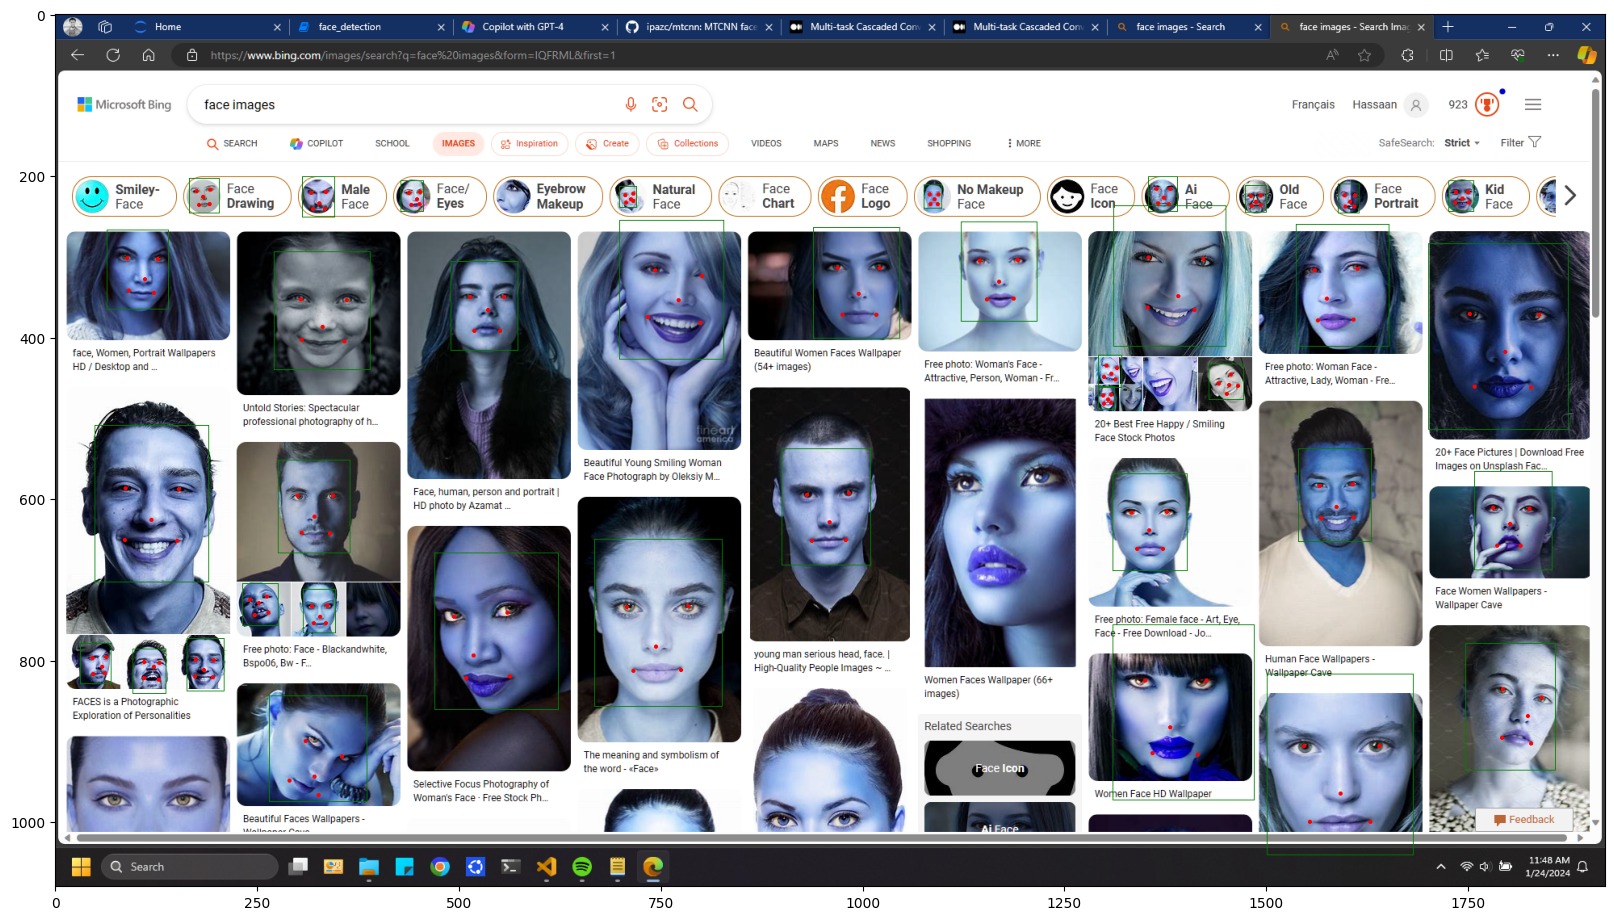

In [17]:
# we can use opencv or PIL to draw the face bounding boxes
temp_pil_image = Image.fromarray(test_image_cv2)
draw = ImageDraw.Draw(temp_pil_image)

for face in faces:
    box = face['box']
    conf_text = face['confidence']
    keypoints = face['keypoints']
    # box output are x, y, height and width
    draw.rectangle([(box[0], box[1]), (box[0]+box[2], box[1]+box[3])], outline ="green")
    # we need to draw for each keypoint
    for keypoint in keypoints.values():
        draw.ellipse((keypoint[0]-2, keypoint[1]-2, keypoint[0]+2, keypoint[1]+2), fill ='red')

plt.figure(figsize=(20,40))
plt.imshow(temp_pil_image)

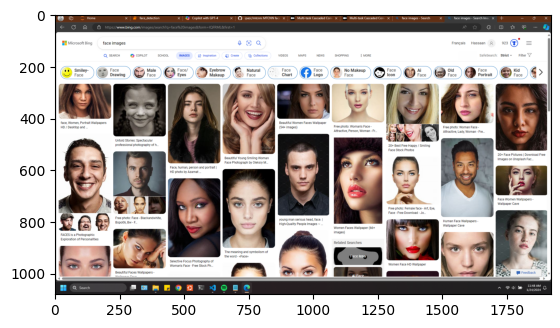

In [18]:
# with the correct channels
test_rgb_image_cv2 = cv2.cvtColor(test_image_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(test_rgb_image_cv2)

In [22]:
faces = face_detector.detect_faces(test_rgb_image_cv2)

9/9 [==============================] - 0s 8ms/step


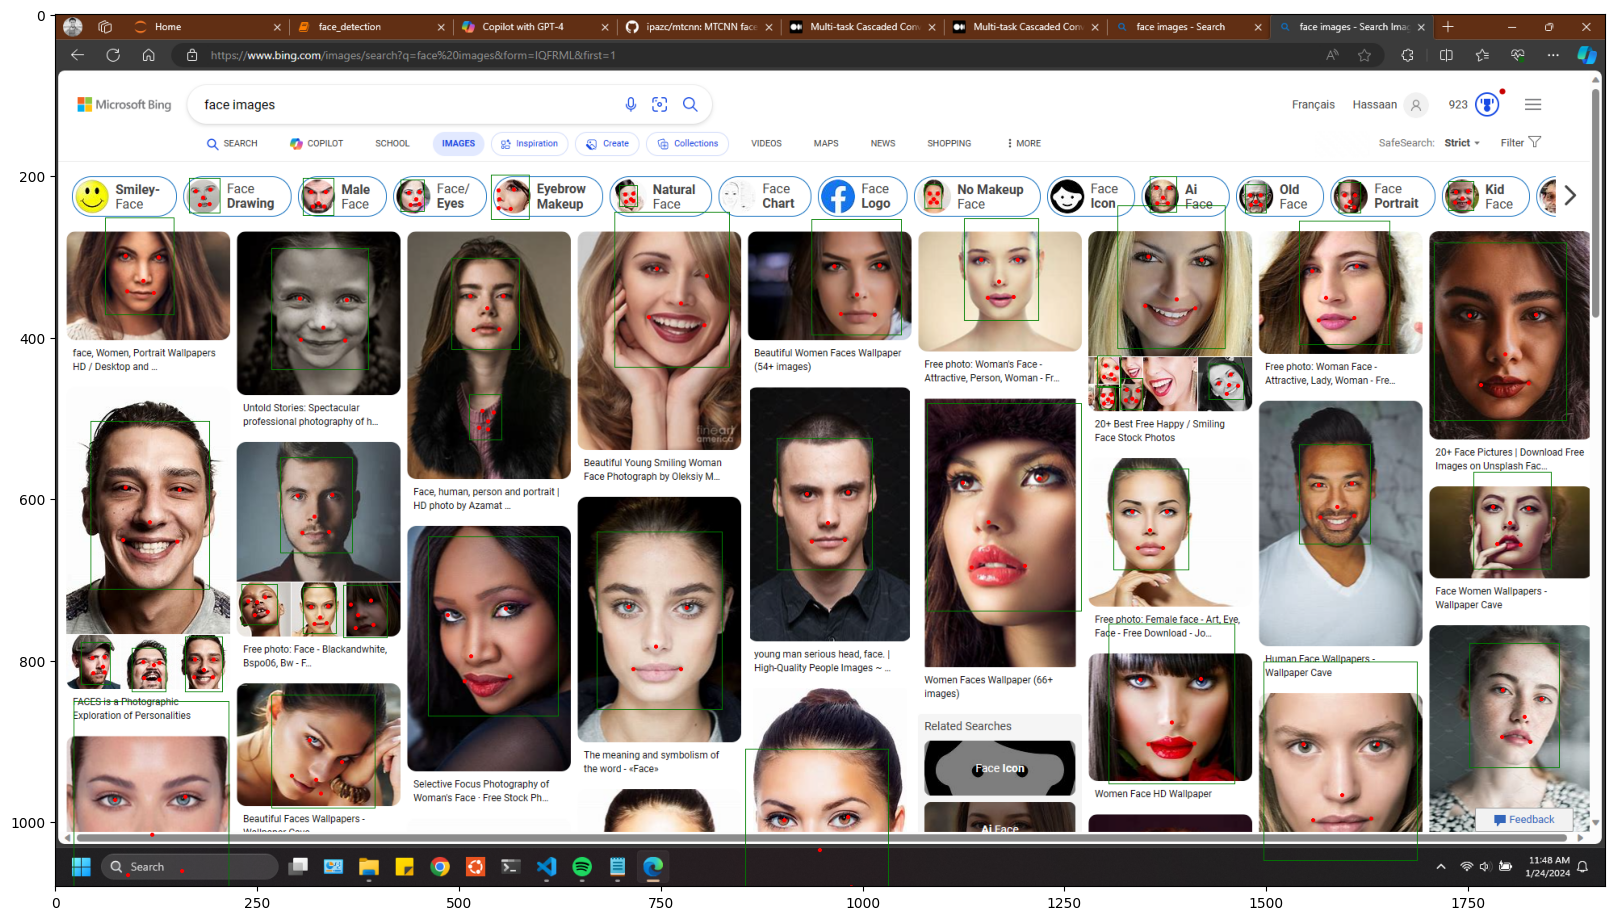

In [23]:
# we can use opencv or PIL to draw the face bounding boxes
temp_pil_image = Image.fromarray(test_rgb_image_cv2)
draw = ImageDraw.Draw(temp_pil_image)

for face in faces:
    box = face['box']
    conf_text = face['confidence']
    keypoints = face['keypoints']
    # box output are x, y, height and width
    draw.rectangle([(box[0], box[1]), (box[0]+box[2], box[1]+box[3])], outline ="green")
    # we need to draw for each keypoint
    for keypoint in keypoints.values():
        draw.ellipse((keypoint[0]-2, keypoint[1]-2, keypoint[0]+2, keypoint[1]+2), fill ='red')

plt.figure(figsize=(20,40))
plt.imshow(temp_pil_image)

# Performance Difference 
## We can see that with RGB color space the detections are much better and the number of faces detected is much higher as well

### matplotlib loads the image in RGBa mode (for png images), doesn't work directly with mtcnn needs to be converted to a RGB image

### We have several options here we can convert the image to jpg format which doesn't support aplha (transparency) channel
### We can also just slice the image and only use the first 3 channels.
### Lets explore both options

# Option 1


(1080, 1920, 4)

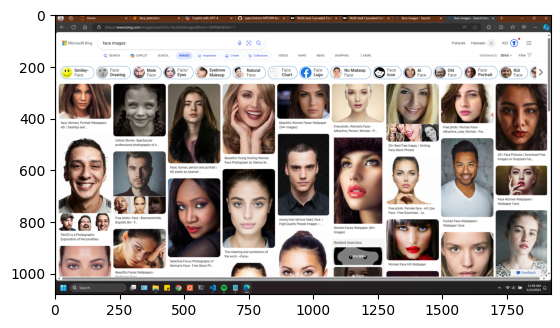

In [24]:
test_image_plt = plt.imread('./face_detection_test.png')
plt.imshow(test_image_plt)
test_image_plt.shape

In [25]:
# Doesn't work with 4 channels at all
faces = face_detector.detect_faces(test_image_plt)

InvalidArgumentError: Graph execution error:

Detected at node model_3/conv2d_12/BiasAdd defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel\kernelbase.py", line 531, in process_one

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel\kernelbase.py", line 775, in execute_request

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\Hassaan\AppData\Local\Temp\ipykernel_20184\757890045.py", line 1, in <module>

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\mtcnn\mtcnn.py", line 300, in detect_faces

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\mtcnn\mtcnn.py", line 342, in __stage1

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\training.py", line 2655, in predict

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Hassaan\anaconda3\envs\step\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 311, in call

input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node model_3/conv2d_12/BiasAdd}}]] [Op:__inference_predict_function_8005]

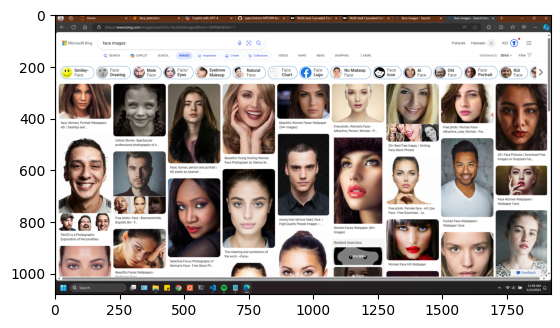

In [27]:
# aparently works but ... next cell
plt.imshow(test_image_plt[:,:,:3])

In [26]:
# mtcnn doesn't detect any faces
faces = face_detector.detect_faces(test_image_plt[:,:,:3])

1/1 [==============================] - 0s 16ms/step


In [31]:
test_image_plt[:,:,0:3].shape

(1080, 1920, 3)

In [ ]:
# Pillow is unabel to create an image form it either so I guess we destroyed the image 

In [32]:
# we can use opencv or PIL to draw the face bounding boxes
temp_pil_image = Image.fromarray(test_image_plt[:,:,0:3])
draw = ImageDraw.Draw(temp_pil_image)

for face in faces:
    box = face['box']
    conf_text = face['confidence']
    keypoints = face['keypoints']
    # box output are x, y, height and width
    draw.rectangle([(box[0], box[1]), (box[0]+box[2], box[1]+box[3])], outline ="green")
    # we need to draw for each keypoint
    for keypoint in keypoints.values():
        draw.ellipse((keypoint[0]-2, keypoint[1]-2, keypoint[0]+2, keypoint[1]+2), fill ='red')

plt.figure(figsize=(20,40))
plt.imshow(temp_pil_image)

TypeError: Cannot handle this data type: (1, 1, 3), <f4

# Option 2

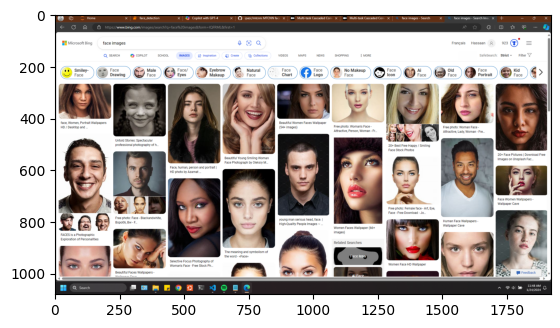

In [33]:
img = PIL.Image.open('./face_detection_test.png')
plt.imshow(img)

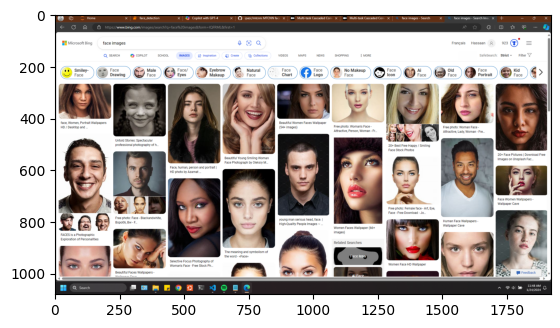

In [34]:
img = img.convert('RGB')
plt.imshow(img)

In [39]:
faces = face_detector.detect_faces(np.array(img))

9/9 [==============================] - 0s 5ms/step


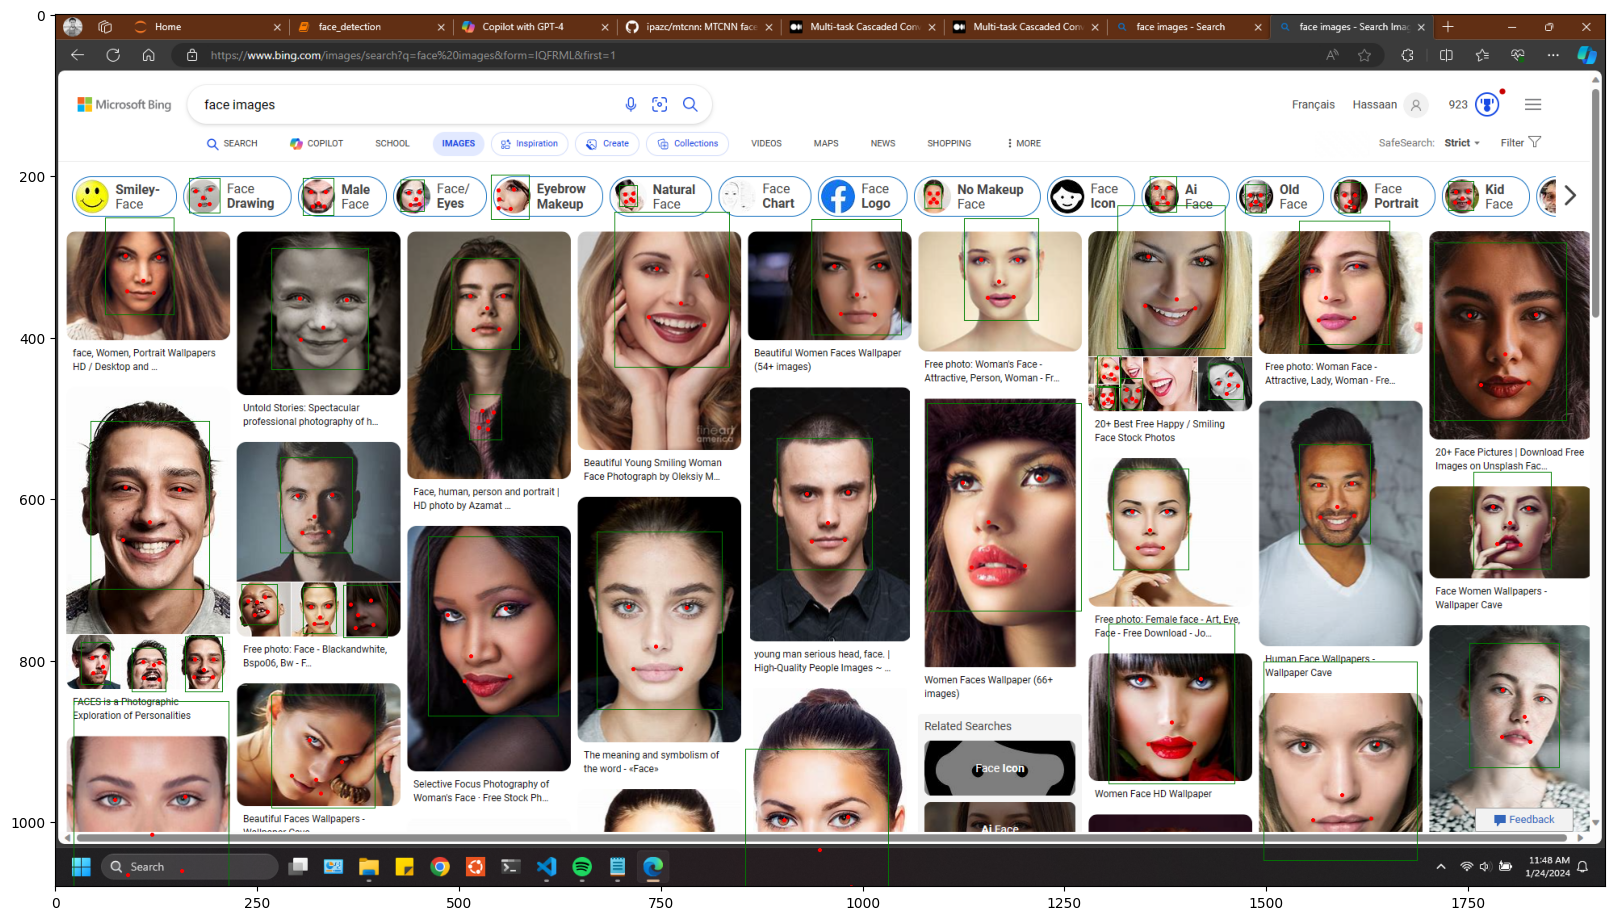

In [40]:
# we can use opencv or PIL to draw the face bounding boxes
draw = ImageDraw.Draw(img)

for face in faces:
    box = face['box']
    conf_text = face['confidence']
    keypoints = face['keypoints']
    # box output are x, y, height and width
    draw.rectangle([(box[0], box[1]), (box[0]+box[2], box[1]+box[3])], outline ="green")
    # we need to draw for each keypoint
    for keypoint in keypoints.values():
        draw.ellipse((keypoint[0]-2, keypoint[1]-2, keypoint[0]+2, keypoint[1]+2), fill ='red')

plt.figure(figsize=(20,40))
plt.imshow(img)

# Conclusion
## I think sticking to Pillow for now would be the best option, we can just convert all images we scrape to RGB and then convert to numpy arrays and give them to the face detection module 

## We can also create a NPZ (numpy compressed) dataset when we convert to numpy arrays not sure about this one yet but there is that option
